In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asl-alphabet/dataset/N/208.jpg
/kaggle/input/asl-alphabet/dataset/N/473.jpg
/kaggle/input/asl-alphabet/dataset/N/333.jpg
/kaggle/input/asl-alphabet/dataset/N/45.jpg
/kaggle/input/asl-alphabet/dataset/N/369.jpg
/kaggle/input/asl-alphabet/dataset/N/56.jpg
/kaggle/input/asl-alphabet/dataset/N/89.jpg
/kaggle/input/asl-alphabet/dataset/N/20.jpg
/kaggle/input/asl-alphabet/dataset/N/275.jpg
/kaggle/input/asl-alphabet/dataset/N/212.jpg
/kaggle/input/asl-alphabet/dataset/N/239.jpg
/kaggle/input/asl-alphabet/dataset/N/58.jpg
/kaggle/input/asl-alphabet/dataset/N/150.jpg
/kaggle/input/asl-alphabet/dataset/N/6.jpg
/kaggle/input/asl-alphabet/dataset/N/109.jpg
/kaggle/input/asl-alphabet/dataset/N/149.jpg
/kaggle/input/asl-alphabet/dataset/N/187.jpg
/kaggle/input/asl-alphabet/dataset/N/436.jpg
/kaggle/input/asl-alphabet/dataset/N/76.jpg
/kaggle/input/asl-alphabet/dataset/N/355.jpg
/kaggle/input/asl-alphabet/dataset/N/71.jpg
/kaggle/input/asl-alphabet/dataset/N/474.jpg
/kaggle/input/asl-a

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU 

In [5]:

'''
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
'''



'\n# detect and init the TPU\ntpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()\n\n# instantiate a distribution strategy\ntpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)\n'

In [6]:
batch_size = 32
img_height = 224
img_width = 224

In [7]:
import pathlib
data_dir = pathlib.Path("/kaggle/input/asl-alphabet/dataset")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

12500


In [8]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            brightness_range=(0.5,1), 
                            zoom_range=0.2,
                            channel_shift_range=0.2,
                            rescale=1./255,
                            horizontal_flip=True,
                            validation_split=0.3)

In [9]:
# train val split

train_ds = img_generator.flow_from_directory(
    directory=data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode = 'categorical',
    subset="training")

val_ds = img_generator.flow_from_directory(
    directory=data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    shuffle=True, 
    class_mode = 'categorical',
    subset="validation")

Found 8750 images belonging to 25 classes.
Found 3750 images belonging to 25 classes.


In [10]:
import os
classes = os.listdir(data_dir)
classes.sort()
print(classes)
print(len(classes))

['A', 'B', 'BLANK', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
25


In [11]:
N=list(range(len(classes)))
normal_mapping=dict(zip(classes,N))
reverse_mapping=dict(zip(N,classes))

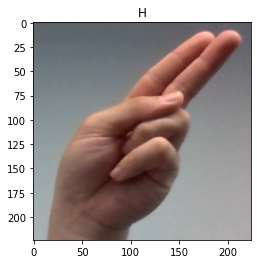

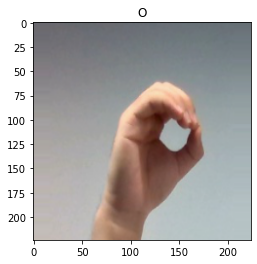

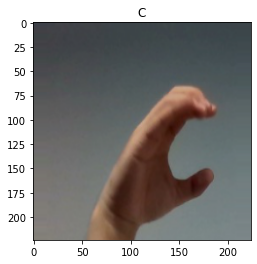

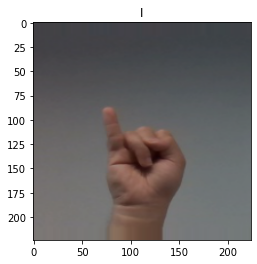

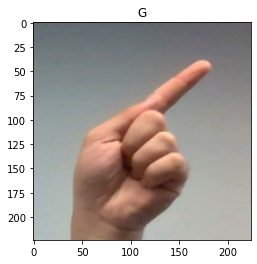

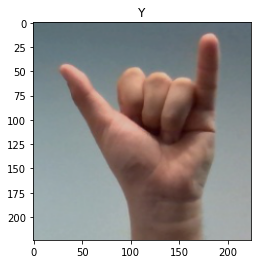

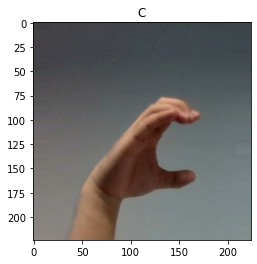

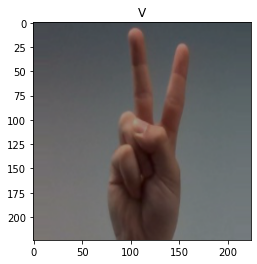

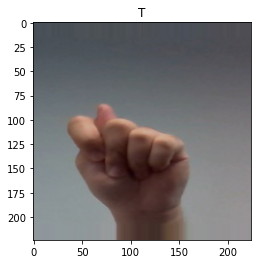

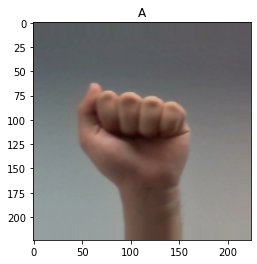

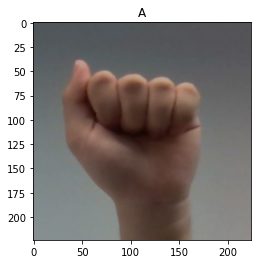

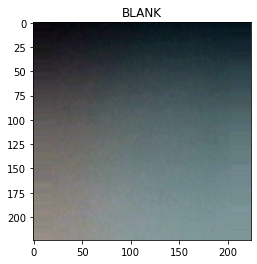

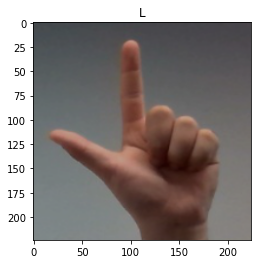

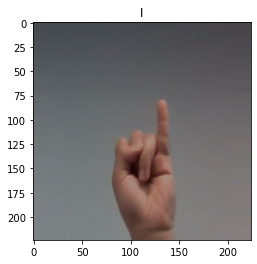

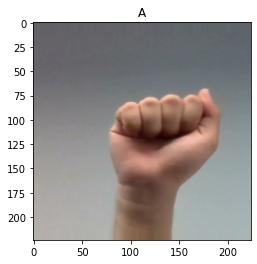

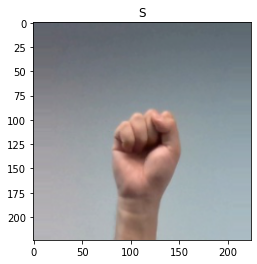

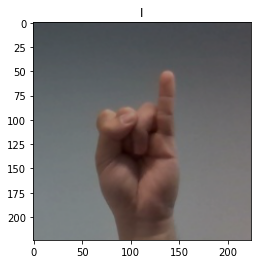

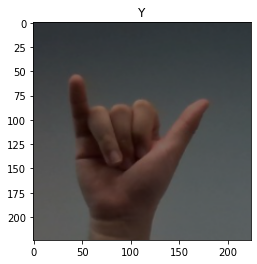

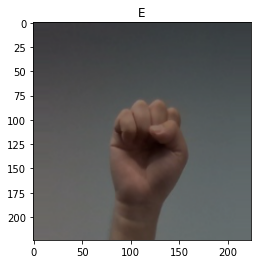

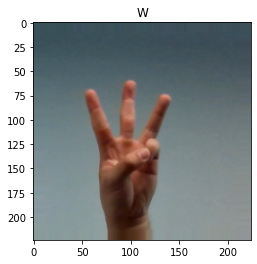

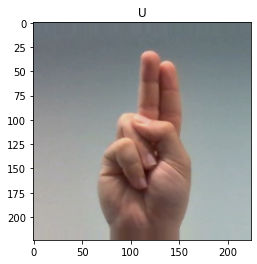

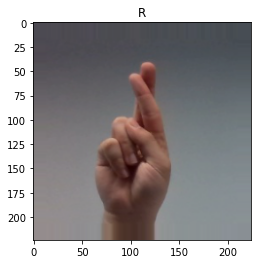

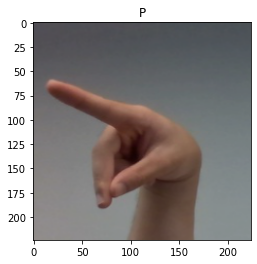

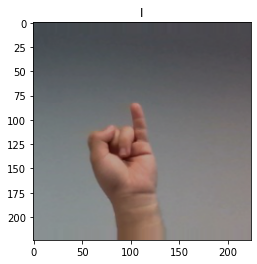

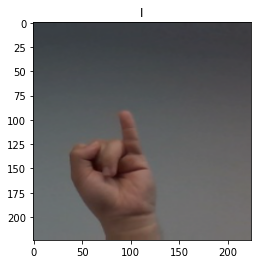

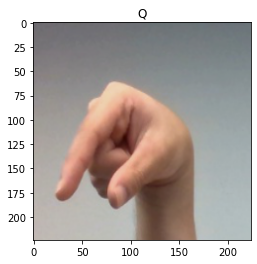

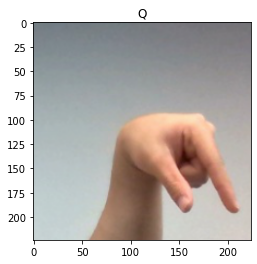

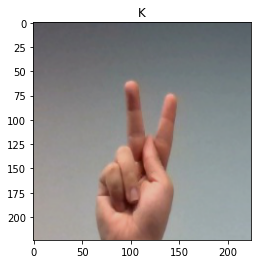

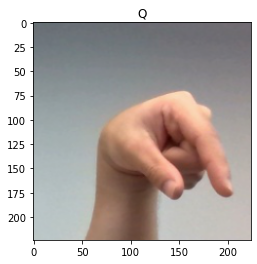

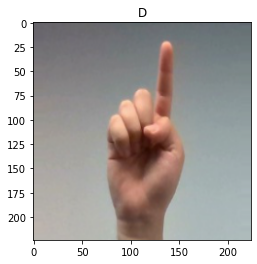

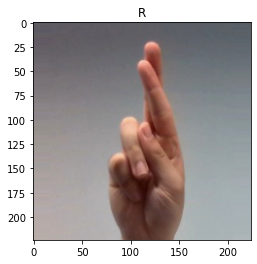

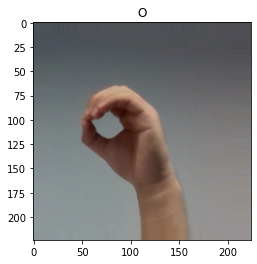

In [12]:
imgs, labels = next(iter(train_ds))
for img, label in zip(imgs, labels):
    value=np.argmax(label)
    labelname=reverse_mapping[value]
    plt.imshow(img)
    plt.title(labelname)
    plt.show()

In [13]:


'''
# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    # Transfer learning: load pre-trained model
    base_model = tf.keras.applications.InceptionV3(input_shape=(img_height,img_width,3),
                                                   include_top=False,
                                                   weights = "imagenet"
                                                   )
    base_model.trainable = False
    model = Sequential([
      base_model,
      layers.GlobalAveragePooling2D(),
      layers.Dropout(0.2),
      layers.Dense(25, activation = "softmax")
    ])
    model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
'''
# Transfer learning: load pre-trained model
base_model = tf.keras.applications.InceptionV3(input_shape=(img_height,img_width,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )
base_model.trainable = False
model = Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(25, activation = "softmax")
])
model.compile(optimizer='sgd',
          loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

2023-02-14 05:55:57.664526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 05:55:57.751953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 05:55:57.752797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 05:55:57.754532: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 0s 0us/step


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=10,restore_best_weights=True)
epochs=64


In [15]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping_monitor]
)

2023-02-14 05:56:46.087856: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/64


2023-02-14 05:56:51.615028: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


274/274 [==============================] - 220s 764ms/step - loss: 1.1936 - categorical_accuracy: 0.7441 - val_loss: 0.6105 - val_categorical_accuracy: 0.9037
Epoch 2/64
274/274 [==============================] - 172s 628ms/step - loss: 0.3873 - categorical_accuracy: 0.9442 - val_loss: 0.3875 - val_categorical_accuracy: 0.9357
Epoch 3/64
274/274 [==============================] - 174s 637ms/step - loss: 0.2493 - categorical_accuracy: 0.9637 - val_loss: 0.3063 - val_categorical_accuracy: 0.9392
Epoch 4/64
274/274 [==============================] - 173s 631ms/step - loss: 0.1924 - categorical_accuracy: 0.9757 - val_loss: 0.2638 - val_categorical_accuracy: 0.9520
Epoch 5/64
274/274 [==============================] - 175s 639ms/step - loss: 0.1538 - categorical_accuracy: 0.9811 - val_loss: 0.2286 - val_categorical_accuracy: 0.9589
Epoch 6/64
274/274 [==============================] - 173s 631ms/step - loss: 0.1306 - categorical_accuracy: 0.9848 - val_loss: 0.2084 - val_categorical_accuracy

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 25)                51225     
Total params: 21,854,009
Trainable params: 51,225
Non-trainable params: 21,802,784
_________________________________________________________________


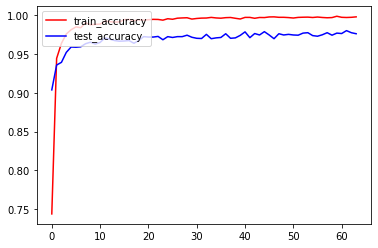

In [17]:
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

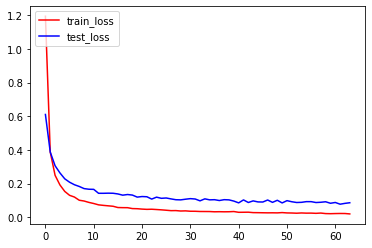

In [18]:
plt.plot(model.history.history["loss"], c="r", label="train_loss")
plt.plot(model.history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()


In [19]:
model.save('my_model.h5')
